In [22]:
import tensorflow_decision_forests as tfdf
from tensorflow import metrics
import os
import sys
import numpy as np
import datatable as dt
from datatable import f
import pandas as pd
import tensorflow as tf
import math
import random
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("../data/processed/merged_reduced.csv", index_col=0)

In [3]:
data.shape

(4012, 12603)

In [19]:
data_reduced = data.drop(data.columns[np.random.choice(range(1, data.shape[1]-1), size=9000, replace=False)], axis=1)
data_reduced = data_reduced.drop(np.random.choice(range(1, data_reduced.shape[0]), size=3000, replace=False), axis=0)

In [5]:
data_reduced.shape

(1012, 3603)

In [20]:
data_reduced.to_csv("../data/processed/pbmc_expr_reduced_1000_3600.csv")

In [6]:
data["cell_type"].value_counts()

singlet    3706
hetero      161
homo        145
Name: cell_type, dtype: int64

In [7]:
def split_dataset(dataset, test_ratio=0.3):
    """splits a panda dataframe in two"""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

In [8]:
training_set, test_set = split_dataset(data_reduced)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(training_set, label="cell_type")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_set, label="cell_type")

/home/klumpi/Uni/courses/MLRegGenomics/doubletdetection/venv/lib/python3.8/site-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features_dataframe = dataframe.drop(label, 1)
2022-07-19 18:41:46.134026: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-19 18:41:46.134059: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (klumpi): /proc/driver/nvidia/version does not exist
2022-07-19 18:41:46.136435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow

In [1]:
train_ds

NameError: name 'train_ds' is not defined

In [9]:
model_1 = tfdf.keras.RandomForestModel()
model_1.fit(x=train_ds, verbose=2)

Use /tmp/tmp0aiaraer as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'C10': <tf.Tensor 'data_1378:0' shape=(None,) dtype=string>, 'OR4F16': <tf.Tensor 'data_2703:0' shape=(None,) dtype=float64>, 'LINC01409': <tf.Tensor 'data_2279:0' shape=(None,) dtype=float64>, 'LINC02593': <tf.Tensor 'data_2392:0' shape=(None,) dtype=float64>, 'CDK11B': <tf.Tensor 'data_1499:0' shape=(None,) dtype=float64>, 'CDK11A': <tf.Tensor 'data_1498:0' shape=(None,) dtype=float64>, 'CALML6': <tf.Tensor 'data_1438:0' shape=(None,) dtype=float64>, 'AL589702.1': <tf.Tensor 'data_1095:0' shape=(None,) dtype=float64>, 'AL354743.1': <tf.Tensor 'data_1000:0' shape=(None,) dtype=float64>, 'AL513320.1': <tf.Tensor 'data_1087:0' shape=(None,) dtype=float64>, 'Z98886.1': <tf.Tensor 'data_3524:0' shape=(None,) dtype=float64>, 'BX005132.1': <tf.Tensor 'data_1368:0' shape=(None,) dtype=float64>, 'ACOT7': <tf.Tensor 'data_806:0' shape=(None,) dtype=float64>, 'AL031848.2': <tf.T

[INFO kernel.cc:813] Start Yggdrasil model training
[INFO kernel.cc:814] Collect training examples
[INFO kernel.cc:422] Number of batches: 1
[INFO kernel.cc:423] Number of examples: 698
[INFO data_spec_inference.cc:303] 698 item(s) have been pruned (i.e. they are considered out of dictionary) for the column C10 (0 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO kernel.cc:836] Training dataset:
Number of records: 698
Number of columns: 3603

Number of columns by type:
	NUMERICAL: 3601 (99.9445%)
	CATEGORICAL: 2 (0.0555093%)

Columns:

NUMERICAL: 3601 (99.9445%)
	0: "AARS" NUMERICAL mean:0.0830946 min:0 max:2 sd:0.310237
	1: "AASDHPPT" NUMERICAL mean:0.0616046 min:0 max:2 sd:0.252072
	2: "ABAT" NUMERICAL mean:0.173352 min:0 max:4 sd:0.507853
	3: "ABCA3" NUMERICAL mean:0.0544413 min:0 max:5 sd:0.311966
	4: "ABCB1" NUMERICAL mean:0.0931232 min:0 max:3 sd:0.352939
	5: "ABCB7" NUMERICAL mean:0.272206 min:0 max:4 sd:0.584274
	6: "ABCC2" NUMERICAL mean:0.0100

Model trained in 0:00:02.830265
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [10]:
model_1.compile(metrics=["Accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()
for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

1/1 [==============================] - 10s 10s/step - loss: 0.0000e+00 - Accuracy: 0.9013

loss: 0.0000
Accuracy: 0.9013


In [11]:
model_1.save("../models/model_1")

INFO:tensorflow:Assets written to: ../models/model_1/assets


INFO:tensorflow:Assets written to: ../models/model_1/assets


In [11]:
with open("plot.html", "w") as f:
    f.write(tfdf.model_plotter.plot_model(model_1, max_depth=3, tree_idx=0))

In [12]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (3602):
	AARS
	AASDHPPT
	ABAT
	ABCA3
	ABCB1
	ABCB7
	ABCC2
	ABCD1
	ABCG8
	ABITRAM
	ABLIM3
	AC000058.1
	AC000085.1
	AC000372.1
	AC002056.2
	AC002057.2
	AC002094.4
	AC002454.1
	AC002511.2
	AC002553.2
	AC003084.1
	AC004129.3
	AC004147.3
	AC004147.5
	AC004156.1
	AC004160.1
	AC004231.1
	AC004231.3
	AC004449.1
	AC004492.1
	AC004540.2
	AC004542.1
	AC004543.1
	AC004674.1
	AC004687.3
	AC004706.3
	AC004765.1
	AC004771.4
	AC004803.1
	AC004817.4
	AC004830.2
	AC004832.1
	AC004846.2
	AC004875.1
	AC004882.2
	AC004893.3
	AC004908.3
	AC004943.1
	AC005041.5
	AC005046.1
	AC005104.3
	AC005280.1
	AC005323.1
	AC005592.1
	AC005609.3
	AC005632.5
	AC00569

In [13]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=698, accuracy=0.9297994269340975, loss=0.2498108212519864, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

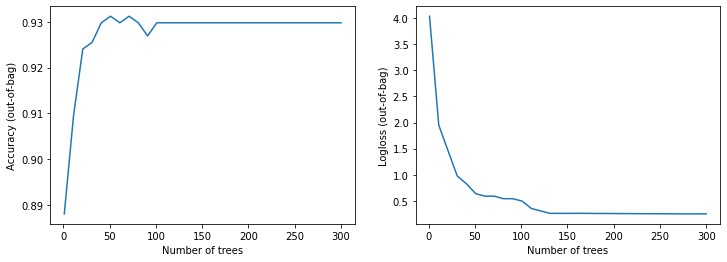

In [16]:
logs = model_1.make_inspector().training_logs()
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()